Since it was impossible to complete the game of sudoku, you might instead enjoy passing the time with a game of Dungeons & Dragons, courtesy of Emma Knight:

The fifth edition of Dungeons & Dragons introduced a system of “advantage and disadvantage.” When you roll a die “with advantage,” you roll the die twice and keep the higher result. Rolling “with disadvantage” is similar, except you keep the lower result instead. The rules further specify that when a player rolls with both advantage and disadvantage, they cancel out, and the player rolls a single die. Yawn!

There are two other, more mathematically interesting ways that advantage and disadvantage could be combined. First, you could have “advantage of disadvantage,” meaning you roll twice with disadvantage and then keep the higher result. Or, you could have “disadvantage of advantage,” meaning you roll twice with advantage and then keep the lower result. With a fair 20-sided die, which situation produces the highest expected roll: advantage of disadvantage, disadvantage of advantage or rolling a single die?

Extra Credit: Instead of maximizing your expected roll, suppose you need to roll N or better with your 20-sided die. For each value of N, is it better to use advantage of disadvantage, disadvantage of advantage or rolling a single die?

In [1]:
from random import randint
from matplotlib import pyplot as plt
from matplotlib import colors
from collections import Counter, namedtuple
import numpy as np
import itertools

In [2]:
DataSet = namedtuple('DataSet', ['label', 'counter', 'probabilities', 'this_or_higher_probabilities', 'expected_value'])

In [3]:
NUM_SIDES = 20
NUM_SAMPLES = 5_000_000

In [4]:
def single_die(num_sides):
    return randint(1,num_sides)

In [5]:
def roll_disadvantage(num_sides):
    return min(randint(1,num_sides), randint(1,num_sides))

In [6]:
def roll_advantage(num_sides):
    return max(randint(1,num_sides), randint(1,num_sides))

In [7]:
def disadvantage_of_advantage(num_sides):
    return min(roll_advantage(num_sides), roll_advantage(num_sides))

In [8]:
def advantage_of_disadvantage(num_sides):
    return max(roll_disadvantage(num_sides), roll_disadvantage(num_sides))

In [9]:
POSSIBLE_NUMBERS = list(range(1, NUM_SIDES+1))

In [10]:
def create_data_set(roll_function, num_sides, num_samples):
    possible_numbers = list(range(1, num_sides+1))
    counter = Counter([roll_function(num_sides) for _ in range(num_samples)])
    probabilities = [counter[x]/num_samples for x in possible_numbers]
    this_or_higher_probabilities = [sum(probabilities[(n-1):]) for n in possible_numbers]
    expected_value = sum([prob*num for prob,num in zip(probabilities, possible_numbers)])
    
    return DataSet(label=roll_function.__name__, counter=counter, probabilities=probabilities, this_or_higher_probabilities=this_or_higher_probabilities, expected_value=expected_value)

In [11]:
data_sets = [
    create_data_set(single_die, NUM_SIDES, NUM_SAMPLES),
    create_data_set(disadvantage_of_advantage, NUM_SIDES, NUM_SAMPLES),
    create_data_set(advantage_of_disadvantage, NUM_SIDES, NUM_SAMPLES),
]

In [12]:
for d in data_sets:
    print(f"{d.expected_value:8.2f} - {d.label}")

   10.50 - single_die
   11.17 - disadvantage_of_advantage
    9.83 - advantage_of_disadvantage


In [13]:
def plot_dice_probabilities(x_coords, data_sets):
    fig, ax = plt.subplots(figsize=(11,8))
    ax.set_xlim(min(x_coords)-0.5, max(x_coords)+0.5)
    ax.xaxis.set_ticks(x_coords)
        
    for d in data_sets:
        ax.scatter(x_coords, d.probabilities, label=d.label, marker='_', s=800)

    ax.legend()
    plt.show()

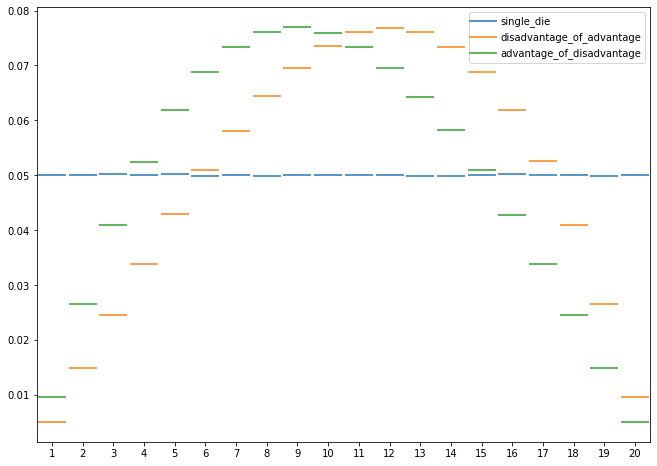

In [14]:
plot_dice_probabilities(
    POSSIBLE_NUMBERS,
    data_sets
)

In [15]:
def plot_dice_this_or_higher(x_coords, data_sets):
    fig, ax = plt.subplots(figsize=(11,8))
    ax.set_xlim(min(x_coords)-0.5, max(x_coords)+0.5)
    ax.set_ylim(0, 1)
    ax.xaxis.set_ticks(x_coords)
        
    for d in data_sets:
        ax.scatter(x_coords, d.this_or_higher_probabilities, label=d.label,marker='_', s=800)

    ax.legend()
    plt.show()

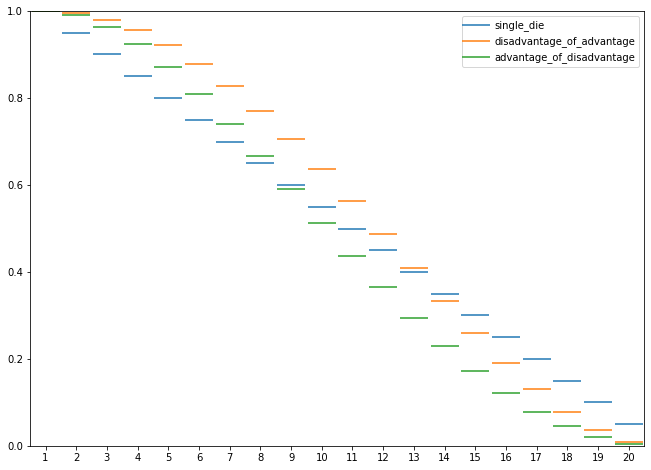

In [16]:
plot_dice_this_or_higher(
    POSSIBLE_NUMBERS,
    data_sets
)